# Exploration done on the EPFL recommender system

In [1]:
import configparser
import matplotlib.pyplot as plt
import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
db_connection = sql.connect(host=credentials.get('mysql', 'url'),
                            database='semester_project_romain',
                            user=credentials.get('mysql', 'username'),
                            password=credentials.get('mysql', 'password'))

In [2]:
# Found courses that should be removed:
courses_to_remove = [
    "Admission année sup.",
    "Projet de master en systèmes de communication",
    "SHS : Introduction au projet",
    "Cycle master",
    "Projet de Master",
    "Groupe Core courses & options",
    "Bloc Projets et SHS",
    "Groupe 2 : Options",
    "Master SC",
    "Mineur",
    "Groupe 1",
    "Projet en systèmes de communication II",
    "Projet en informatique II",
    "Projet de master en informatique",
    "Cours réservés spécifiquement aux étudiants s'inscrivant pour le mineur Area and Cultural Studies",
    "SHS : Projet",
    "Optional project in communication systems",
    "Optional project in computer science",
    "Mineur : Neurosciences computationnelles",
    "Stage d'ingénieur crédité avec le PDM (master en Systèmes de communication)",
    "Cours UNIL - Faculté des hautes études commerciales HEC I (printemps)",
]

domains_to_remove = [
    "Humanities and social sciences",
    "Programme Sciences humaines et sociales",
]

In [3]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                LevelName = "Master"
                and IsStudent = 1
                and IsEnrolled = 1
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
                
            """
#all_df = pd.read_sql(all_info, con=db_connection)
#all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
#all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
#print(all_df.UnitName.unique())
#all_df

In [4]:
# PlanType = "PLAN_EXAMINE" ?????
years = """and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""

years_test = """and (YearName = "2006-2007"
                or YearName = "2007-2008"
                or YearName = "2008-2009"
                or YearName = "2009-2010"
                or YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID, 
                UnitCode,
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                (UnitName like "%nform%" 
                or UnitName like "%omm%")
                and LevelName = "Master"
                {}
            """.format('')

all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
all_df

,PersonID,PedagogicalCode,StudyDomain,UnitName,UnitID,UnitCode,SubjectName,SubjectID,SectionName,CourseCode,YearName
0,49334748,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
1,57349668,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
2,29123807,MA1,Architecture,Informatique,249847,IN,Théorie de l'espace,227270058,Architecture,AR-461,2012-2013
3,2384545,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
4,105055035,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
5,2392890,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
6,2502759,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
7,109679682,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
8,2416702,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
9,40908413,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009


In [5]:
current_courses = """
            select distinct 
                PedagogicalCode, 
                SubjectName, 
                SubjectID,
                StudyDomain,
                YearName
            from 
                Course_Enrolments 
            where 
                UnitName like "%ommunication%" 
                and 
                LevelName = "Master"
                and left(PedagogicalCode, 2) = "MA"
                and YearName = "2015-2016"
            """
#current_courses_df = pd.read_sql(current_courses, con=db_connection)
# These are the current courses (latest data) given in syscom @EPFL
#current_courses_df = current_courses_df[~current_courses_df.SubjectName.isin(courses_to_remove)]
#current_courses_df = current_courses_df[~current_courses_df.StudyDomain.isin(domains_to_remove)]
#current_courses_df

### Most taken courses
We need to find a way to get a cleaner dataset of courses, a lot of them are not usefull or outdated and should not be recommended.

In [6]:
# Taking a look at the most taken courses
registrations_df = all_df.set_index(['SubjectName', 'YearName'])
all_df_registrations = registrations_df.groupby(['SubjectName', 'YearName']).size()

registrations_df['Registration'] = all_df_registrations
registrations_df = registrations_df.reset_index()
# Pick only courses that have a study domain (removes bullshit)
# such as Projects and groups, minors etc
registrations_df = registrations_df[~registrations_df.StudyDomain.isnull()]
# Remove the SHS courses
registrations_df = registrations_df[~(registrations_df.StudyDomain == "Programme Sciences humaines et sociales")]
# Removes non important information
registrations_df = registrations_df.drop([
    'PersonID', "StudyDomain", "SectionName", "PedagogicalCode",
    "CourseCode"], axis=1)
registrations_df = registrations_df.drop_duplicates()
registrations_df = registrations_df.set_index(['SubjectName', 'YearName']).sort_index()
registrations = registrations_df.sort_values(ascending=False, by='Registration')

# Latest data registrations
registrations.xs('2015-2016', level='YearName')

,UnitName,UnitID,UnitCode,SubjectID,Registration
SubjectName,,,,,
Pattern classification and machine learning,Informatique,249847,IN,1771468,192
Pattern classification and machine learning,Systèmes de communication - master,950840,SC_EPFL,1771468,192
Cryptography and security,Informatique,249847,IN,1770973,170
Cryptography and security,Systèmes de communication - master,950840,SC_EPFL,1770973,170
Distributed algorithms,Informatique,249847,IN,1773287,167
Distributed algorithms,Systèmes de communication - master,950840,SC_EPFL,1773287,167
TCP/IP networking,Systèmes de communication - master,950840,SC_EPFL,1771764,167
TCP/IP networking,Informatique,249847,IN,1771764,167
Intelligent agents,Systèmes de communication - master,950840,SC_EPFL,1771183,130


### Creating the binary matrix

In [7]:
courses_matrix = all_df[['PersonID', 'SubjectName']]
courses_matrix = courses_matrix.drop_duplicates()
courses_matrix = courses_matrix.set_index(['PersonID', 'SubjectName'])

def series_to_integers(series):
    "Converts a whole series to integers"
    return pd.to_numeric(series, downcast='integer')

# If the course was taken, set it to 1
courses_matrix['joined'] = 1
courses_matrix = courses_matrix.reset_index().pivot(index='PersonID', columns='SubjectName', values='joined')
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)

# Removing all students that took less than five courses
MIN_COURSES_BY_STUDENT = 10
courses_matrix =courses_matrix[np.sum(courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT]
courses_matrix

SubjectName,Accounting for finance,Advanced algorithms,Advanced analysis I,Advanced analysis II,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced computer networks and distributed systems,Advanced cryptography,Advanced databases,...,Traitement des signaux biomédicaux,Traitement quantique de l'information,Traitement quantique de l'information I,Traitement quantique de l'information II,Unsupervised and reinforcement learning in neural networks,VLSI design I,VLSI design I + EDA TP,VLSI design II,Virtual reality,Wireless receivers: algorithms and architectures
PersonID,,,,,,,,,,,,,,,,,,,,,
2383414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2384545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2392890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2394223,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2394686,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2412404,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2414145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416702,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting test/train

In [8]:
def split_data(data):
    testing_set = data.applymap(lambda x: 0)

    taken_courses_flat = data.stack().to_frame()
    taken_courses_flat = taken_courses_flat[taken_courses_flat[0] == 1]

    for student in taken_courses_flat.index.get_level_values('PersonID').unique():
        courses = taken_courses_flat.loc[student]
        for course in courses.sample(frac=0.2, replace=False).index:
            testing_set.loc[student, course] = 1
    training_set = data - testing_set

    return training_set, testing_set

training_set, testing_set = split_data(courses_matrix)

# Numpify the data
train_np = training_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np = testing_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users = np.array(np.arange(courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

### Metrics

In [9]:
# Precision is the percentage of recommended items that are "good ones"
# Hence, the matched prediction divided by N of Top-N
def precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns precision
    """
    precisions = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        precisions.append(nb_right_pred / y_pred.shape[1])
    return np.mean(precisions)
    
#Recall is the percentage of good ones that are recommended.
def recall(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns recall
    """
    recall = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        recall.append(nb_right_pred / y_true[i].sum())
    return np.mean(recall)
    
def f1_score(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns f1 score
    """
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

def mean_average_precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns the mean average precision
    """
    N = y_pred.shape[1]
    average_prec = []
    for i, user in enumerate(y_pred):
        summed_prec = 0
        for k in np.arange(N):
            prec_k = sum(y_true[i, user] == 1) / N
            rel_k = y_true[i, user[-1]]
            summed_prec += (prec_k * rel_k)
        average_prec.append(summed_prec / min(N, y_true[i].sum()))
    
    return np.mean(average_prec)

#### Collaborative filtering with Collaborative Denoising Auto-Encoders

In [10]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, Activation
from keras.layers.merge import Add
from keras.models import Model
from keras.regularizers import l2

def create(I, U, K, hidden_activation, output_activation, q=0.5, l=0.01):
    '''
    create model
    Reference:
      Yao Wu, Christopher DuBois, Alice X. Zheng, Martin Ester.
        Collaborative Denoising Auto-Encoders for Top-N Recommender Systems.
          The 9th ACM International Conference on Web Search and Data Mining (WSDM'16), p153--162, 2016.

    :param I: number of items
    :param U: number of users
    :param K: number of units in hidden layer
    :param hidden_activation: activation function of hidden layer
    :param output_activation: activation function of output layer
    :param q: drop probability
    :param l: regularization parameter of L2 regularization
    :return: CDAE
    :rtype: keras.models.Model
    '''
    x_item = Input((I,), name='x_item')
    h_item = Dropout(q)(x_item)
    h_item = Dense(K, kernel_regularizer=l2(l), bias_regularizer=l2(l))(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='x_user')
    h_user = Embedding(input_dim=U, output_dim=K, input_length=1, embeddings_regularizer=l2(l))(x_user)
    h_user = Flatten()(h_user)

#    h = merge([h_item, h_user], mode='sum')
    h = Add()([h_item, h_user])
    if hidden_activation:
        h = Activation(hidden_activation)(h)
    y = Dense(I, activation=output_activation)(h)

    return Model(inputs=[x_item, x_user], outputs=y)

def success_rate(true, pred):
    """
    The success rate is defined as the percentage of chances that we pick
    one of the recommendations.
    """
    cnt = 0
    for i in range(pred.shape[0]):
        t = np.where(true[i] == 1) # true set
        ary = np.intersect1d(pred[i], t)
        if ary.size > 0:
            cnt += 1
    return cnt * 100 / pred.shape[0]

Using TensorFlow backend.


In [11]:
#for k_test in np.arange(2, 30, 5):
q_test = 0.998
    #q_test = 0.99
#for q_test in np.arange(0.9975, 0.9985, 0.0001):
    #k_test = 18
k_test = 27

# model
# Q was 0.50, now 0.998 ?
model = create(I=train_np.shape[1], U=len(users)+1, K=k_test,
                    hidden_activation='relu', output_activation='sigmoid', q=q_test, l=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam') 
#model.compile(loss='binary_crossentropy', optimizer='adam') 

#    model.summary()

# train
history = model.fit(x=[train_np, users], y=train_np,
                    batch_size=128, epochs=2000, verbose=0,
                    #validation_data=[[test_np, users],
                    #test_np])
                    validation_split=0.20)

In [12]:
N = 20
pred = model.predict(x=[test_np, users])
pred = pred * (train_np == 0) # remove watched items from predictions

pred = np.argsort(pred)

mean_aps = []
precisions, recalls, f1s = [], [], []

print("For k =", k_test, ":")
print("For q =", q_test, ":")
print("\tdifference of success rates at 10 - 1:", success_rate(test_np, pred[:,-10:]) - success_rate(test_np, pred[:,-1:]))
for n in range(1, N + 1):
    prediction_at_n = pred[:, -n:]
    mean_ap = mean_average_precision(test_np, prediction_at_n)
    mean_aps.append(mean_ap)
    prec = precision(test_np, prediction_at_n)
    precisions.append(prec)
    rec = recall(test_np, prediction_at_n)
    recalls.append(rec)
    f1 = f1_score(test_np, prediction_at_n)
    f1s.append(f1)
    sr = success_rate(test_np, prediction_at_n)
    print("\n\tSuccess Rate at {:d}: {:f}".format(n, sr))
    print("\tMAP at {}: {}".format(n, mean_ap))
    print("\tPrecision at {}: {}".format(n, prec))
    print("\tRecall at {}: {}".format(n, rec))
    print("\tF1 score at {}: {}".format(n, f1))

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 47.75

	Success Rate at 1: 32.500000
	MAP at 1: 0.325
	Precision at 1: 0.325
	Recall at 1: 0.1019702380952381
	F1 score at 1: 0.1552348357056224

	Success Rate at 2: 48.625000
	MAP at 2: 0.2125
	Precision at 2: 0.293125
	Recall at 2: 0.18405654761904763
	F1 score at 2: 0.22612599246568083

	Success Rate at 3: 59.375000
	MAP at 3: 0.16875
	Precision at 3: 0.25708333333333333
	Recall at 3: 0.24168154761904762
	F1 score at 3: 0.2491446380443755

	Success Rate at 4: 65.125000
	MAP at 4: 0.16541666666666666
	Precision at 4: 0.22875
	Recall at 4: 0.28699404761904757
	F1 score at 4: 0.25458321311097004

	Success Rate at 5: 69.500000
	MAP at 5: 0.1706458333333333
	Precision at 5: 0.20225
	Recall at 5: 0.317702380952381
	F1 score at 5: 0.24715842796959428

	Success Rate at 6: 71.500000
	MAP at 6: 0.17637499999999995
	Precision at 6: 0.17895833333333333
	Recall at 6: 0.33809821428571424
	F1 score at 6: 0.234038204177723

	Succe

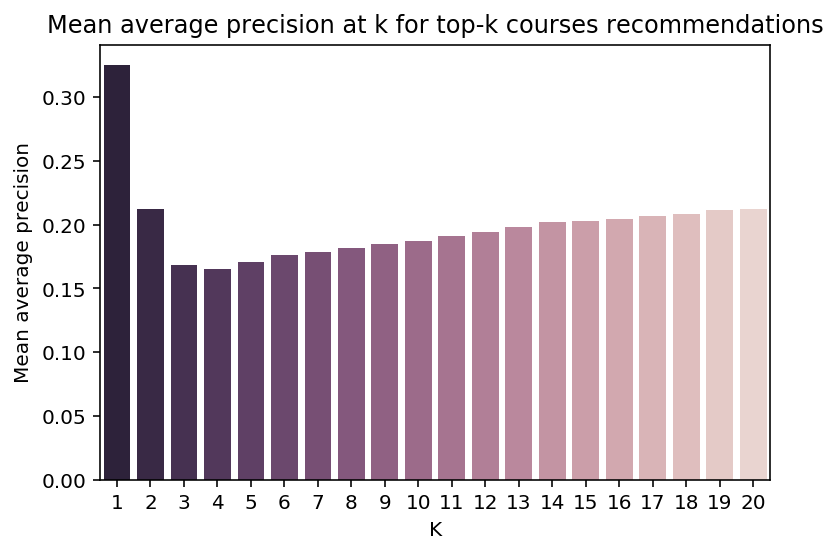

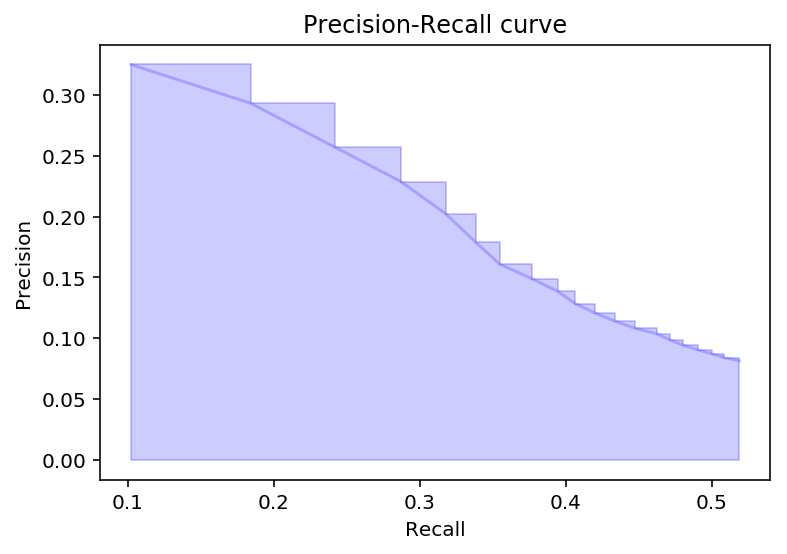

In [13]:
# Plotting the MAP at k
map_df = pd.DataFrame(mean_aps)
map_df.index.name = 'K'
map_df.rename(columns={0:'Mean average precision'}, inplace=True)
map_df = map_df.reset_index()
map_df['K'] = map_df['K'] + 1

col_pal = sns.cubehelix_palette(N, reverse=True)
sns.barplot(x="K", y="Mean average precision", data=map_df, palette=col_pal)
plt.title("Mean average precision at k for top-k courses recommendations")
plt.show()


prec_rec_df = pd.DataFrame(data={"Precision":precisions, "Recall":recalls})
plt.plot(recalls, precisions, color='b', alpha=0.2)
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### Splitting into group1, group2 courses

In [14]:
group1_courses = ["Advanced algorithms", "Advanced computer architecture",
                 "Cryptography and security", "Advanced databases",
                 "Distributed algorithms", "Distributed information systems",
                 "Foundations of software", "Information theory and coding",
                 "Pattern classification and machine learning"]
MIN_COURSES_BY_STUDENT_group1 = 2
MIN_COURSES_BY_STUDENT_group2 = 3

group1_courses_matrix = courses_matrix[group1_courses]
group1_courses_matrix = group1_courses_matrix[np.sum(group1_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group1]
group2_courses_matrix = courses_matrix.drop(group1_courses, axis=1)
group2_courses_matrix = group2_courses_matrix[np.sum(group2_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group2]

training_set_group1, testing_set_group1 = split_data(group1_courses_matrix)
training_set_group2, testing_set_group2 = split_data(group2_courses_matrix)

# Numpify the data
train_np_1 = training_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_1 = testing_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
train_np_2 = training_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_2 = testing_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users_group1 = np.array(np.arange(group1_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)
users_group2 = np.array(np.arange(group2_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

#### Analysis group 1

In [15]:
#for k_test in np.arange(2, 30, 5):
q_test = 0.998
    #q_test = 0.99
#for q_test in np.arange(0.9975, 0.9985, 0.0001):
    #k_test = 18
k_test = 27

# model
# Q was 0.50, now 0.998 ?
model_group1 = create(I=train_np_1.shape[1], U=len(users_group1)+1, K=k_test,
                    hidden_activation='relu', output_activation='sigmoid', q=q_test, l=0.01)

model_group1.compile(loss='mean_absolute_error', optimizer='adam') 

# train
history = model_group1.fit(x=[train_np_1, users_group1], y=train_np_1,
                    batch_size=128, epochs=2000, verbose=0,
                    validation_split=0.20)

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 56.28491620111732

	Success Rate at 1: 43.715084
	MAP at 1: 0.4371508379888268
	Precision at 1: 0.4371508379888268
	Recall at 1: 0.4350558659217877
	F1 score at 1: 0.4361008359760434

	Success Rate at 2: 64.944134
	MAP at 2: 0.4371508379888268
	Precision at 2: 0.3268156424581006
	Recall at 2: 0.6494413407821229
	F1 score at 2: 0.4348190951159278

	Success Rate at 3: 79.050279
	MAP at 3: 0.4371508379888268
	Precision at 3: 0.2648975791433892
	Recall at 3: 0.7905027932960894
	F1 score at 3: 0.3968205464362372

	Success Rate at 4: 86.592179
	MAP at 4: 0.4371508379888268
	Precision at 4: 0.21752793296089384
	Recall at 4: 0.8659217877094972
	F1 score at 4: 0.3477082009300785

	Success Rate at 5: 91.061453
	MAP at 5: 0.4371508379888268
	Precision at 5: 0.18296089385474856
	Recall at 5: 0.9106145251396648
	F1 score at 5: 0.30470115656014324


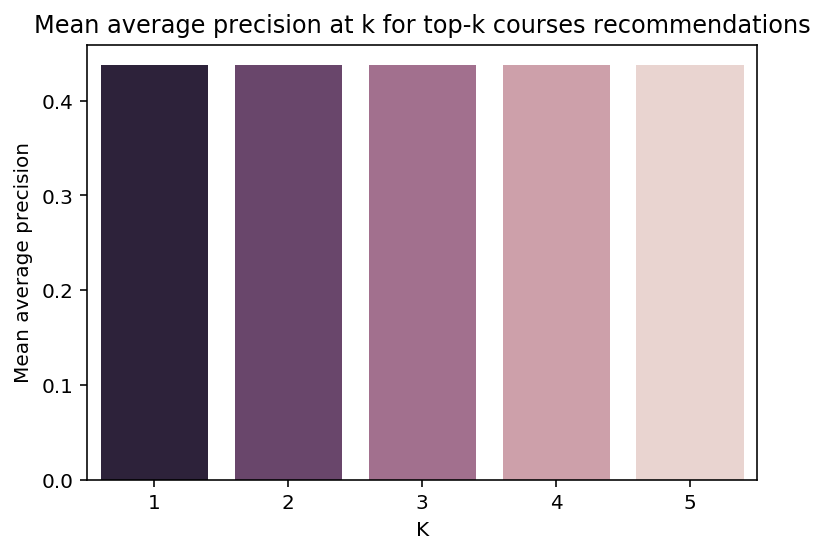

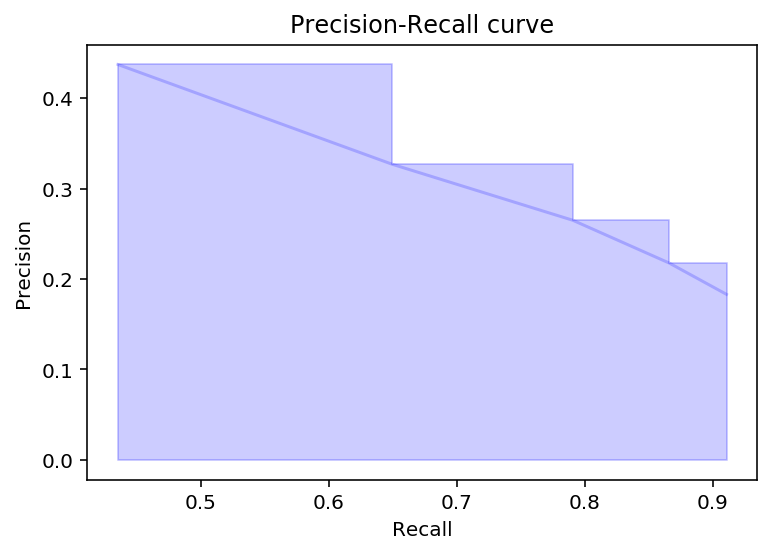

In [16]:
N = 5
pred = model_group1.predict(x=[test_np_1, users_group1])
pred = pred * (train_np_1 == 0) # remove watched items from predictions

pred = np.argsort(pred)

mean_aps = []
precisions, recalls, f1s = [], [], []

print("For k =", k_test, ":")
print("For q =", q_test, ":")
print("\tdifference of success rates at 10 - 1:", success_rate(test_np_1, pred[:,-10:]) - success_rate(test_np_1, pred[:,-1:]))
for n in range(1, N + 1):
    prediction_at_n = pred[:, -n:]
    mean_ap = mean_average_precision(test_np_1, prediction_at_n)
    mean_aps.append(mean_ap)
    prec = precision(test_np_1, prediction_at_n)
    precisions.append(prec)
    rec = recall(test_np_1, prediction_at_n)
    recalls.append(rec)
    f1 = f1_score(test_np_1, prediction_at_n)
    f1s.append(f1)
    sr = success_rate(test_np_1, prediction_at_n)
    print("\n\tSuccess Rate at {:d}: {:f}".format(n, sr))
    print("\tMAP at {}: {}".format(n, mean_ap))
    print("\tPrecision at {}: {}".format(n, prec))
    print("\tRecall at {}: {}".format(n, rec))
    print("\tF1 score at {}: {}".format(n, f1))
    

# Plotting the MAP at k
map_df = pd.DataFrame(mean_aps)
map_df.index.name = 'K'
map_df.rename(columns={0:'Mean average precision'}, inplace=True)
map_df = map_df.reset_index()
map_df['K'] = map_df['K'] + 1

col_pal = sns.cubehelix_palette(N, reverse=True)
sns.barplot(x="K", y="Mean average precision", data=map_df, palette=col_pal)
plt.title("Mean average precision at k for top-k courses recommendations")
plt.show()


prec_rec_df = pd.DataFrame(data={"Precision":precisions, "Recall":recalls})
plt.plot(recalls, precisions, color='b', alpha=0.2)
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

#### Analysis group 2

In [17]:
#for k_test in np.arange(31, 36, 2):
q_test = 0.998
#for q_test in np.arange(0.990, 0.9999, 0.001):
k_test = 31

# model
# Q was 0.50, now 0.998 ?
model_group2 = create(I=train_np_2.shape[1], U=len(users_group2)+1, K=k_test,
                    hidden_activation='relu', output_activation='sigmoid', q=q_test, l=0.01)

model_group2.compile(loss='mean_absolute_error', optimizer='adam') 

# train
history = model_group2.fit(x=[train_np_2, users_group2], y=train_np_2,
                    batch_size=128, epochs=2000, verbose=0,
                    validation_split=0.20)

N = 10
pred = model_group2.predict(x=[test_np_2, users_group2])
pred = pred * (train_np_2 == 0) # remove watched items from predictions

pred = np.argsort(pred)

mean_aps = []
precisions, recalls, f1s = [], [], []

print()
print("For k =", k_test, ":")
print("For q =", q_test, ":")
print("\tdifference of success rates at 10 - 1:", success_rate(test_np_2, pred[:,-10:]) - success_rate(test_np_2, pred[:,-1:]))
for n in range(1, N + 1):
    prediction_at_n = pred[:, -n:]
    mean_ap = mean_average_precision(test_np_2, prediction_at_n)
    mean_aps.append(mean_ap)
    prec = precision(test_np_2, prediction_at_n)
    precisions.append(prec)
    rec = recall(test_np_2, prediction_at_n)
    recalls.append(rec)
    f1 = f1_score(test_np_2, prediction_at_n)
    f1s.append(f1)
    sr = success_rate(test_np_2, prediction_at_n)
    print("\n\tSuccess Rate at {:d}: {:f}".format(n, sr))
    print("\tMAP at {}: {}".format(n, mean_ap))
    print("\tPrecision at {}: {}".format(n, prec))
    print("\tRecall at {}: {}".format(n, rec))
    print("\tF1 score at {}: {}".format(n, f1))

#from multiprocessing import Pool
#from itertools import product
#ks = np.arange(2, 35, 5)
#qs = np.arange(0.7, 0.99, 0.05)
#ks = np.arange(2, 4, 5)
#qs = np.arange(0.7, 0.72, 0.05)
#combinations = list(product(ks, qs))
#print(combinations)
#def rando(a):
#    return 

#if __name__ == '__main__':
#    pool = Pool(processes=1)
#    results = pool.map(get_success_rate, combinations)
#    print(results)


For k = 31 :
For q = 0.998 :
	difference of success rates at 10 - 1: 20.625

	Success Rate at 1: 30.375000
	MAP at 1: 0.30375
	Precision at 1: 0.30375
	Recall at 1: 0.12639583333333332
	F1 score at 1: 0.1785103162687073

	Success Rate at 2: 36.750000
	MAP at 2: 0.17
	Precision at 2: 0.19625
	Recall at 2: 0.16485416666666666
	F1 score at 2: 0.17918724398546126

	Success Rate at 3: 39.875000
	MAP at 3: 0.14666666666666667
	Precision at 3: 0.14916666666666667
	Recall at 3: 0.1889583333333333
	F1 score at 3: 0.16672109262682272

	Success Rate at 4: 42.250000
	MAP at 4: 0.1473958333333333
	Precision at 4: 0.1215625
	Recall at 4: 0.20572916666666663
	F1 score at 4: 0.152823639401655

	Success Rate at 5: 44.000000
	MAP at 5: 0.14979166666666666
	Precision at 5: 0.10274999999999998
	Recall at 5: 0.21733333333333335
	F1 score at 5: 0.13953241343400155

	Success Rate at 6: 46.375000
	MAP at 6: 0.15289583333333334
	Precision at 6: 0.09104166666666666
	Recall at 6: 0.2299375
	F1 score at 6: 0.130

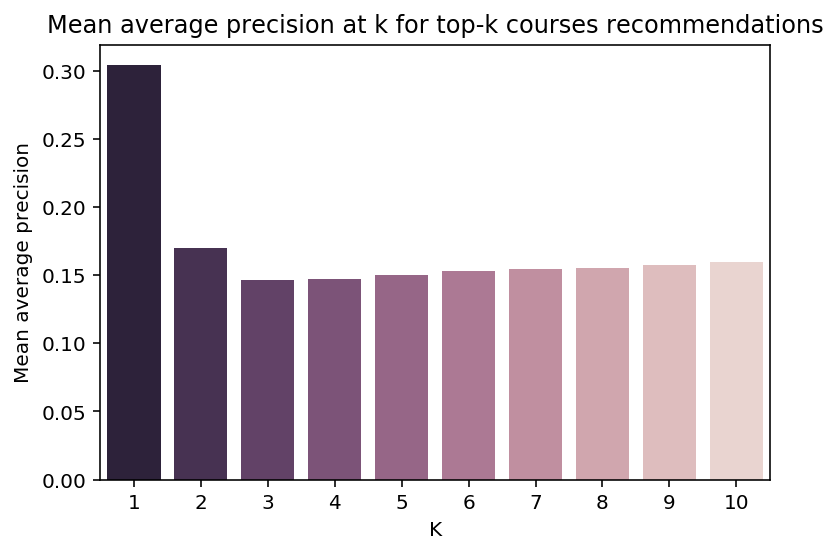

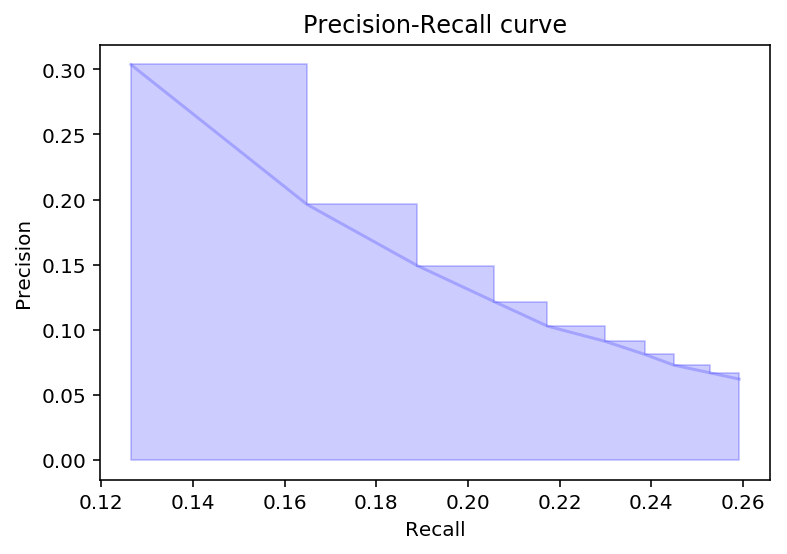

In [18]:
# Plotting the MAP at k
map_df = pd.DataFrame(mean_aps)
map_df.index.name = 'K'
map_df.rename(columns={0:'Mean average precision'}, inplace=True)
map_df = map_df.reset_index()
map_df['K'] = map_df['K'] + 1

col_pal = sns.cubehelix_palette(N, reverse=True)
sns.barplot(x="K", y="Mean average precision", data=map_df, palette=col_pal)
plt.title("Mean average precision at k for top-k courses recommendations")
plt.show()


prec_rec_df = pd.DataFrame(data={"Precision":precisions, "Recall":recalls})
plt.plot(recalls, precisions, color='b', alpha=0.2)
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### Prediction for a student

In [19]:
me = [ 
"Distributed information systems",
"Information theory and coding",
"Pattern classification and machine learning",
"Mobile networks",
"Statistical signal and data processing through applications",
"TCP/IP networking",
"Digital education & learning analytics"]
my_courses = pd.DataFrame(data=0, columns=courses_matrix.columns, index=["Romain"])
my_courses[me] = 1
taken_courses = my_courses.loc["Romain"][my_courses.loc["Romain"] == 1].index.tolist()

my_binary_courses = my_courses.as_matrix()
binary_courses_format = np.array([[1]], dtype=np.int32)

In [20]:
pred = model.predict(x=[my_binary_courses, binary_courses_format])
pred = np.argsort(pred)

predicted_courses = [courses_matrix.columns[i] for i in pred[0]]
last_year_courses = list(registrations.xs('2015-2016', level='YearName').index)
predicted_courses = [c for c in predicted_courses if c in last_year_courses and c not in taken_courses]

print("I picked the following courses: \n\t-{} \n\nHence we propose the following: \n\t-{}"
     .format("\n\t-".join(taken_courses), "\n\t-".join(predicted_courses[::-1][:10])))

I picked the following courses: 
	-Digital education & learning analytics
	-Distributed information systems
	-Information theory and coding
	-Mobile networks
	-Pattern classification and machine learning
	-Statistical signal and data processing through applications
	-TCP/IP networking 

Hence we propose the following: 
	-Distributed algorithms
	-Cryptography and security
	-Biometrics
	-Intelligent agents
	-Advanced digital communications
	-Stage d'ingénieur crédité avec le PDM (master en Informatique)
	-Concurrent algorithms
	-Management de projet et analyse du risque
	-Foundations of software
	-Program parallelization on PC clusters


### Done
- All data gives really bad results (discrimination by section)
- Results are different from one domain to another (BEFORE WEIGHING OUT THE OBLIGATORY COURSES, or courses that are bloat (laboratories etc..., case by case basis ?)
- [They talk a bit about top-N recommendation in this paper (Boi)](http://delivery.acm.org/10.1145/2810000/2800184/p179-maksai.pdf?ip=128.179.189.64&id=2800184&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=1003867347&CFTOKEN=59100520&__acm__=1510214008_777b3b2b2f3763bb6c7aa57bcdcdf49a)
- Move to the new data
- Right precision and recall metrics
- Right test/train se
- Try on like 5 sections with same parameters if still good results
- Doing it by faculty gives same results (for IC)
- Split options and obligatory recommendations
- Quick hard-coded demo for taken courses

### Questions

### To do
- Try to split on postprocessing, measure which one is better.
- Normalize co-enrolment matrix, sum of row or col = 1
- Multiply probability of taking course at output with proba that a student takes the predicted course before argsort (mean of coenrolment inbetween one prediction and ALL courses the student took). Then compare baseline with new system.
- Correlation grades used by multiply to each pair of course, and put it in the pipeline. Then compare baseline with this one
- Try by faculty (all courses from ENAC for example, IC is not, and all good)
- Porting code to usable codebase for next coder ?
- Replace names by ids from DB by production code day
- Automatic best parameters detection ? Need a cluster ? Grid Search ?
- start working on demo, boxes for each course and recommend stuff